In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
file_path = "tablet_cleaned_2024.csv"  # Update with correct path
df = pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.2,8.0,256.0,...,32.0,NaN,50.0,2.0,Android,14.0,NaN,NaN,not_available,Wi-Fi
1,1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.2,4.0,64.0,...,5.0,NaN,8.0,NaN,Android,13.0,1TB,NaN,5G,Wi-Fi
2,2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.2,8.0,128.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,5G,Wi-Fi
3,3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.2,8.0,256.0,...,8.0,NaN,13.0,NaN,Android,13.0,NaN,NaN,not_available,Wi-Fi
4,4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.2,8.0,256.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,5G,Wi-Fi


In [4]:
df.tail(10)

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
380,380,DOMO Slate SLP9 Tablet,DOMO,4.10,10439,NaN,NaN,NaN,4.0,64.0,...,5.0,NaN,13.0,NaN,Android,9.0,NaN,Dual Sim,not_available,Wi-Fi
381,381,Teclast M40 Pro Tablet,Teclast,4.00,16990,Tiger,8.0,2.0,6.0,128.0,...,5.0,NaN,8.0,NaN,NaN,NaN,Supported,Dual Sim,not_available,Wi-Fi
382,382,Teclast M40 Air Tablet,Teclast,4.30,17990,Helio,8.0,2.0,8.0,128.0,...,5.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,not_available,Wi-Fi
383,383,iKall N9 Pro Tablet,iKall,4.50,3950,Quad,4.0,1.3,2.0,16.0,...,0.3,NaN,2.0,NaN,NaN,NaN,32GB,Dual Sim,not_available,Wi-Fi
384,384,DOMO Slate SSM25 Tablet,DOMO,4.25,8490,Helio,4.0,1.5,2.0,32.0,...,2.0,NaN,5.0,NaN,NaN,NaN,128GB,Dual Sim,not_available,Wi-Fi
385,385,Lenovo Tab K10 FHD Tablet (Wi-Fi + 32GB),Lenovo,4.40,9899,Helio,8.0,2.0,3.0,32.0,...,5.0,NaN,8.0,NaN,NaN,NaN,256GB,NaN,not_available,Wi-Fi
386,386,Apple iPad Pro 12.9 2021 Tablet (1TB),Apple,4.40,171575,Apple,8.0,NaN,16.0,1000.0,...,12.0,NaN,12.0,10.0,iOS,14.5,Not_available,Single Sim,5G,Wi-Fi
387,387,Honor Pad 7,Honor,4.00,15590,Helio,8.0,2.0,4.0,64.0,...,2.0,NaN,5.0,NaN,NaN,NaN,512GB,Single Sim,not_available,Wi-Fi
388,388,Lenovo Tab M10 (Wi-Fi+32GB),Lenovo,4.00,11999,Snapdragon,8.0,1.8,3.0,32.0,...,5.0,NaN,8.0,NaN,NaN,NaN,Supported,NaN,not_available,Wi-Fi
389,389,iBall iTAB BizniZ Tablet,iBall,4.50,9990,Cortex,8.0,1.2,2.0,32.0,...,8.0,NaN,8.0,NaN,NaN,NaN,256GB,Single Sim,not_available,Wi-Fi


In [5]:
df.sample()

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
88,88,Vivo Pad 2,Vivo,4.0,29990,Dimensity,8.0,3.05,8.0,128.0,...,8.0,NaN,13.0,2.0,Android,13.0,NaN,NaN,not_available,Wi-Fi


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             390 non-null    int64  
 1   name                   390 non-null    object 
 2   brand                  390 non-null    object 
 3   rating                 390 non-null    float64
 4   price                  390 non-null    int64  
 5   processor_brand        379 non-null    object 
 6   num_processor          379 non-null    float64
 7   processor_speed        325 non-null    float64
 8   ram                    365 non-null    float64
 9   memory_inbuilt         387 non-null    float64
 10  battery_capacity       359 non-null    float64
 11  charger                208 non-null    float64
 12  charging               229 non-null    object 
 13  display_size_inches    389 non-null    float64
 14  pixel                  384 non-null    object 
 15  resolu

In [7]:
df.size

11310

In [8]:
df.shape

(390, 29)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

Unnamed: 0                 0
name                       0
brand                      0
rating                     0
price                      0
processor_brand           11
num_processor             11
processor_speed           65
ram                       25
memory_inbuilt             3
battery_capacity          31
charger                  182
charging                 161
display_size_inches        1
pixel                      6
resolution_width           6
resolution_height          6
ppi                        6
frequency_display_hz     286
primary_front_camera       4
secondry_front_camera    380
primary_rear_camera        5
secondry_rear_camera     316
os_brand                 261
version                  263
memory_card_upto          67
sim                      146
is_5G                     43
is_wifi                    0
dtype: int64

In [11]:
import pandas as pd

# Load the CSV file
#df = pd.read_csv('tablet_cleaned_2024.csv')

# Replace 1 with 1024 in the 'memory_card_upto' column
df['memory_card_upto'].replace('1TB', '1024GB', inplace=True)

# Save the updated file
#df.to_csv('tablet_cleaned_2024_replaced.csv', index=False)

#print("Values of 1TB in 'memory_card_upto' have been replaced with 1024GB.")


In [12]:
df.head()

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.2,8.0,256.0,...,32.0,NaN,50.0,2.0,Android,14.0,NaN,NaN,not_available,Wi-Fi
1,1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.2,4.0,64.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024GB,NaN,5G,Wi-Fi
2,2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.2,8.0,128.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024GB,Single Sim,5G,Wi-Fi
3,3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.2,8.0,256.0,...,8.0,NaN,13.0,NaN,Android,13.0,NaN,NaN,not_available,Wi-Fi
4,4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.2,8.0,256.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024GB,Single Sim,5G,Wi-Fi


In [13]:
df.tail()

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
385,385,Lenovo Tab K10 FHD Tablet (Wi-Fi + 32GB),Lenovo,4.4,9899,Helio,8.0,2.0,3.0,32.0,...,5.0,NaN,8.0,NaN,NaN,NaN,256GB,NaN,not_available,Wi-Fi
386,386,Apple iPad Pro 12.9 2021 Tablet (1TB),Apple,4.4,171575,Apple,8.0,NaN,16.0,1000.0,...,12.0,NaN,12.0,10.0,iOS,14.5,Not_available,Single Sim,5G,Wi-Fi
387,387,Honor Pad 7,Honor,4.0,15590,Helio,8.0,2.0,4.0,64.0,...,2.0,NaN,5.0,NaN,NaN,NaN,512GB,Single Sim,not_available,Wi-Fi
388,388,Lenovo Tab M10 (Wi-Fi+32GB),Lenovo,4.0,11999,Snapdragon,8.0,1.8,3.0,32.0,...,5.0,NaN,8.0,NaN,NaN,NaN,Supported,NaN,not_available,Wi-Fi
389,389,iBall iTAB BizniZ Tablet,iBall,4.5,9990,Cortex,8.0,1.2,2.0,32.0,...,8.0,NaN,8.0,NaN,NaN,NaN,256GB,Single Sim,not_available,Wi-Fi


In [14]:
df['memory_card_upto'] = df['memory_card_upto'].str.replace('GB','')

In [15]:
df.head(10)

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.20,8.0,256.0,...,32.0,NaN,50.0,2.0,Android,14.0,NaN,NaN,not_available,Wi-Fi
1,1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.20,4.0,64.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,NaN,5G,Wi-Fi
2,2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.20,8.0,128.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,Single Sim,5G,Wi-Fi
3,3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.20,8.0,256.0,...,8.0,NaN,13.0,NaN,Android,13.0,NaN,NaN,not_available,Wi-Fi
4,4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.20,8.0,256.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,Single Sim,5G,Wi-Fi
5,5,Samsung Galaxy Tab A9 Plus Tablet (5G+ 8GB RAM...,Samsung,4.75,23399,Snapdragon,8.0,2.20,8.0,128.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,NaN,5G,Wi-Fi
6,6,OnePlus Pad Go Tablet,OnePlus,4.60,21999,Helio,8.0,2.20,8.0,128.0,...,8.0,NaN,8.0,NaN,NaN,NaN,1024,Single Sim,not_available,Wi-Fi
7,7,Xiaomi Redmi Pad (4GB RAM + 128GB),Xiaomi,4.70,12599,Helio,8.0,2.20,4.0,128.0,...,8.0,NaN,8.0,NaN,NaN,NaN,1024,NaN,not_available,Wi-Fi
8,8,Apple iPad 9th Gen 10.2 2021 Tablet (Wi-Fi+64GB),Apple,4.70,25999,Bionic,6.0,2.65,NaN,64.0,...,12.0,NaN,8.0,NaN,iOS,15.0,Not_available,NaN,not_available,Wi-Fi
9,9,Honor Pad 9,Honor,4.65,16990,Snapdragon,8.0,2.20,8.0,128.0,...,8.0,NaN,13.0,NaN,Android,13.0,NaN,NaN,not_available,Wi-Fi


In [16]:
df.tail()

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
385,385,Lenovo Tab K10 FHD Tablet (Wi-Fi + 32GB),Lenovo,4.4,9899,Helio,8.0,2.0,3.0,32.0,...,5.0,NaN,8.0,NaN,NaN,NaN,256,NaN,not_available,Wi-Fi
386,386,Apple iPad Pro 12.9 2021 Tablet (1TB),Apple,4.4,171575,Apple,8.0,NaN,16.0,1000.0,...,12.0,NaN,12.0,10.0,iOS,14.5,Not_available,Single Sim,5G,Wi-Fi
387,387,Honor Pad 7,Honor,4.0,15590,Helio,8.0,2.0,4.0,64.0,...,2.0,NaN,5.0,NaN,NaN,NaN,512,Single Sim,not_available,Wi-Fi
388,388,Lenovo Tab M10 (Wi-Fi+32GB),Lenovo,4.0,11999,Snapdragon,8.0,1.8,3.0,32.0,...,5.0,NaN,8.0,NaN,NaN,NaN,Supported,NaN,not_available,Wi-Fi
389,389,iBall iTAB BizniZ Tablet,iBall,4.5,9990,Cortex,8.0,1.2,2.0,32.0,...,8.0,NaN,8.0,NaN,NaN,NaN,256,Single Sim,not_available,Wi-Fi


In [17]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
df.isnull().sum()

name                       0
brand                      0
rating                     0
price                      0
processor_brand           11
num_processor             11
processor_speed           65
ram                       25
memory_inbuilt             3
battery_capacity          31
charger                  182
charging                 161
display_size_inches        1
pixel                      6
resolution_width           6
resolution_height          6
ppi                        6
frequency_display_hz     286
primary_front_camera       4
secondry_front_camera    380
primary_rear_camera        5
secondry_rear_camera     316
os_brand                 261
version                  263
memory_card_upto          67
sim                      146
is_5G                     43
is_wifi                    0
dtype: int64

In [19]:
# Handle missing values 
df['memory_card_upto'].fillna(0, inplace=True)
# Replace 'Not_available' with 0 in 'memory_card_upto' column
df['memory_card_upto'].replace('Not_available', 0, inplace=True)

In [20]:
# Replace 'supported' with NaN (if it's a placeholder for missing values)
df['memory_card_upto'].replace('supported', pd.NA, inplace=True)

# Convert the column to numeric, coercing any non-numeric values to NaN
df['memory_card_upto'] = pd.to_numeric(df['memory_card_upto'], errors='coerce')

# Fill missing values (NaN) with the mode value
mode_value = df['memory_card_upto'].mode()[0]
df['memory_card_upto'].fillna(mode_value, inplace=True)

# Convert to integer type
df['memory_card_upto'] = df['memory_card_upto'].astype(int)

# Verify the results
print(df['memory_card_upto'].unique())
print(df.dtypes)

[   0 1024  512  256   64  128   32]
name                      object
brand                     object
rating                   float64
price                      int64
processor_brand           object
num_processor            float64
processor_speed          float64
ram                      float64
memory_inbuilt           float64
battery_capacity         float64
charger                  float64
charging                  object
display_size_inches      float64
pixel                     object
resolution_width         float64
resolution_height        float64
ppi                      float64
frequency_display_hz     float64
primary_front_camera     float64
secondry_front_camera    float64
primary_rear_camera      float64
secondry_rear_camera     float64
os_brand                  object
version                  float64
memory_card_upto           int64
sim                       object
is_5G                     object
is_wifi                   object
dtype: object


In [21]:
df.tail(10)

,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
380,DOMO Slate SLP9 Tablet,DOMO,4.10,10439,NaN,NaN,NaN,4.0,64.0,5020.0,...,5.0,NaN,13.0,NaN,Android,9.0,0,Dual Sim,not_available,Wi-Fi
381,Teclast M40 Pro Tablet,Teclast,4.00,16990,Tiger,8.0,2.0,6.0,128.0,7000.0,...,5.0,NaN,8.0,NaN,NaN,NaN,1024,Dual Sim,not_available,Wi-Fi
382,Teclast M40 Air Tablet,Teclast,4.30,17990,Helio,8.0,2.0,8.0,128.0,6000.0,...,5.0,NaN,8.0,NaN,NaN,NaN,1024,Single Sim,not_available,Wi-Fi
383,iKall N9 Pro Tablet,iKall,4.50,3950,Quad,4.0,1.3,2.0,16.0,3000.0,...,0.3,NaN,2.0,NaN,NaN,NaN,32,Dual Sim,not_available,Wi-Fi
384,DOMO Slate SSM25 Tablet,DOMO,4.25,8490,Helio,4.0,1.5,2.0,32.0,4020.0,...,2.0,NaN,5.0,NaN,NaN,NaN,128,Dual Sim,not_available,Wi-Fi
385,Lenovo Tab K10 FHD Tablet (Wi-Fi + 32GB),Lenovo,4.40,9899,Helio,8.0,2.0,3.0,32.0,7500.0,...,5.0,NaN,8.0,NaN,NaN,NaN,256,NaN,not_available,Wi-Fi
386,Apple iPad Pro 12.9 2021 Tablet (1TB),Apple,4.40,171575,Apple,8.0,NaN,16.0,1000.0,NaN,...,12.0,NaN,12.0,10.0,iOS,14.5,0,Single Sim,5G,Wi-Fi
387,Honor Pad 7,Honor,4.00,15590,Helio,8.0,2.0,4.0,64.0,5100.0,...,2.0,NaN,5.0,NaN,NaN,NaN,512,Single Sim,not_available,Wi-Fi
388,Lenovo Tab M10 (Wi-Fi+32GB),Lenovo,4.00,11999,Snapdragon,8.0,1.8,3.0,32.0,7000.0,...,5.0,NaN,8.0,NaN,NaN,NaN,1024,NaN,not_available,Wi-Fi
389,iBall iTAB BizniZ Tablet,iBall,4.50,9990,Cortex,8.0,1.2,2.0,32.0,7000.0,...,8.0,NaN,8.0,NaN,NaN,NaN,256,Single Sim,not_available,Wi-Fi


In [22]:
df.head(10)

,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.20,8.0,256.0,10000.0,...,32.0,NaN,50.0,2.0,Android,14.0,0,NaN,not_available,Wi-Fi
1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.20,4.0,64.0,7040.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,NaN,5G,Wi-Fi
2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.20,8.0,128.0,10200.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,Single Sim,5G,Wi-Fi
3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.20,8.0,256.0,8840.0,...,8.0,NaN,13.0,NaN,Android,13.0,0,NaN,not_available,Wi-Fi
4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.20,8.0,256.0,10200.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,Single Sim,5G,Wi-Fi
5,Samsung Galaxy Tab A9 Plus Tablet (5G+ 8GB RAM...,Samsung,4.75,23399,Snapdragon,8.0,2.20,8.0,128.0,7040.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,NaN,5G,Wi-Fi
6,OnePlus Pad Go Tablet,OnePlus,4.60,21999,Helio,8.0,2.20,8.0,128.0,8000.0,...,8.0,NaN,8.0,NaN,NaN,NaN,1024,Single Sim,not_available,Wi-Fi
7,Xiaomi Redmi Pad (4GB RAM + 128GB),Xiaomi,4.70,12599,Helio,8.0,2.20,4.0,128.0,8000.0,...,8.0,NaN,8.0,NaN,NaN,NaN,1024,NaN,not_available,Wi-Fi
8,Apple iPad 9th Gen 10.2 2021 Tablet (Wi-Fi+64GB),Apple,4.70,25999,Bionic,6.0,2.65,NaN,64.0,NaN,...,12.0,NaN,8.0,NaN,iOS,15.0,0,NaN,not_available,Wi-Fi
9,Honor Pad 9,Honor,4.65,16990,Snapdragon,8.0,2.20,8.0,128.0,8300.0,...,8.0,NaN,13.0,NaN,Android,13.0,0,NaN,not_available,Wi-Fi


In [23]:
df.isnull().sum()

name                       0
brand                      0
rating                     0
price                      0
processor_brand           11
num_processor             11
processor_speed           65
ram                       25
memory_inbuilt             3
battery_capacity          31
charger                  182
charging                 161
display_size_inches        1
pixel                      6
resolution_width           6
resolution_height          6
ppi                        6
frequency_display_hz     286
primary_front_camera       4
secondry_front_camera    380
primary_rear_camera        5
secondry_rear_camera     316
os_brand                 261
version                  263
memory_card_upto           0
sim                      146
is_5G                     43
is_wifi                    0
dtype: int64

In [24]:
df.tail(10)

,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
380,DOMO Slate SLP9 Tablet,DOMO,4.10,10439,NaN,NaN,NaN,4.0,64.0,5020.0,...,5.0,NaN,13.0,NaN,Android,9.0,0,Dual Sim,not_available,Wi-Fi
381,Teclast M40 Pro Tablet,Teclast,4.00,16990,Tiger,8.0,2.0,6.0,128.0,7000.0,...,5.0,NaN,8.0,NaN,NaN,NaN,1024,Dual Sim,not_available,Wi-Fi
382,Teclast M40 Air Tablet,Teclast,4.30,17990,Helio,8.0,2.0,8.0,128.0,6000.0,...,5.0,NaN,8.0,NaN,NaN,NaN,1024,Single Sim,not_available,Wi-Fi
383,iKall N9 Pro Tablet,iKall,4.50,3950,Quad,4.0,1.3,2.0,16.0,3000.0,...,0.3,NaN,2.0,NaN,NaN,NaN,32,Dual Sim,not_available,Wi-Fi
384,DOMO Slate SSM25 Tablet,DOMO,4.25,8490,Helio,4.0,1.5,2.0,32.0,4020.0,...,2.0,NaN,5.0,NaN,NaN,NaN,128,Dual Sim,not_available,Wi-Fi
385,Lenovo Tab K10 FHD Tablet (Wi-Fi + 32GB),Lenovo,4.40,9899,Helio,8.0,2.0,3.0,32.0,7500.0,...,5.0,NaN,8.0,NaN,NaN,NaN,256,NaN,not_available,Wi-Fi
386,Apple iPad Pro 12.9 2021 Tablet (1TB),Apple,4.40,171575,Apple,8.0,NaN,16.0,1000.0,NaN,...,12.0,NaN,12.0,10.0,iOS,14.5,0,Single Sim,5G,Wi-Fi
387,Honor Pad 7,Honor,4.00,15590,Helio,8.0,2.0,4.0,64.0,5100.0,...,2.0,NaN,5.0,NaN,NaN,NaN,512,Single Sim,not_available,Wi-Fi
388,Lenovo Tab M10 (Wi-Fi+32GB),Lenovo,4.00,11999,Snapdragon,8.0,1.8,3.0,32.0,7000.0,...,5.0,NaN,8.0,NaN,NaN,NaN,1024,NaN,not_available,Wi-Fi
389,iBall iTAB BizniZ Tablet,iBall,4.50,9990,Cortex,8.0,1.2,2.0,32.0,7000.0,...,8.0,NaN,8.0,NaN,NaN,NaN,256,Single Sim,not_available,Wi-Fi


In [25]:
# Replace 'Single Sim' and 'Dual Sim' with 1, and others with 0
df['sim'] = df['sim'].apply(lambda x: 1 if x in ['Single Sim', 'Dual Sim'] else 0)

# Verify the changes
print(df['sim'].unique())

[0 1]


In [26]:
df.head(10)

,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.20,8.0,256.0,10000.0,...,32.0,NaN,50.0,2.0,Android,14.0,0,0,not_available,Wi-Fi
1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.20,4.0,64.0,7040.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,0,5G,Wi-Fi
2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.20,8.0,128.0,10200.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,1,5G,Wi-Fi
3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.20,8.0,256.0,8840.0,...,8.0,NaN,13.0,NaN,Android,13.0,0,0,not_available,Wi-Fi
4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.20,8.0,256.0,10200.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,1,5G,Wi-Fi
5,Samsung Galaxy Tab A9 Plus Tablet (5G+ 8GB RAM...,Samsung,4.75,23399,Snapdragon,8.0,2.20,8.0,128.0,7040.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,0,5G,Wi-Fi
6,OnePlus Pad Go Tablet,OnePlus,4.60,21999,Helio,8.0,2.20,8.0,128.0,8000.0,...,8.0,NaN,8.0,NaN,NaN,NaN,1024,1,not_available,Wi-Fi
7,Xiaomi Redmi Pad (4GB RAM + 128GB),Xiaomi,4.70,12599,Helio,8.0,2.20,4.0,128.0,8000.0,...,8.0,NaN,8.0,NaN,NaN,NaN,1024,0,not_available,Wi-Fi
8,Apple iPad 9th Gen 10.2 2021 Tablet (Wi-Fi+64GB),Apple,4.70,25999,Bionic,6.0,2.65,NaN,64.0,NaN,...,12.0,NaN,8.0,NaN,iOS,15.0,0,0,not_available,Wi-Fi
9,Honor Pad 9,Honor,4.65,16990,Snapdragon,8.0,2.20,8.0,128.0,8300.0,...,8.0,NaN,13.0,NaN,Android,13.0,0,0,not_available,Wi-Fi


In [27]:
# Display the primary and secondary front camera columns
display_columns = df[['primary_front_camera', 'secondry_front_camera']]
print(display_columns.head(10))  # Displaying the first 10 rows for a quick look

   primary_front_camera  secondry_front_camera
0                  32.0                    NaN
1                   5.0                    NaN
2                  13.0                    NaN
3                   8.0                    NaN
4                  13.0                    NaN
5                   5.0                    NaN
6                   8.0                    NaN
7                   8.0                    NaN
8                  12.0                    NaN
9                   8.0                    NaN


In [28]:
# Convert 'is_5G' column to binary (0 and 1)
df['is_5G'] = df['is_5G'].apply(lambda x: 1 if x == '5G' else 0)

In [29]:
df.head(10)

,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.20,8.0,256.0,10000.0,...,32.0,NaN,50.0,2.0,Android,14.0,0,0,0,Wi-Fi
1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.20,4.0,64.0,7040.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,0,1,Wi-Fi
2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.20,8.0,128.0,10200.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,1,1,Wi-Fi
3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.20,8.0,256.0,8840.0,...,8.0,NaN,13.0,NaN,Android,13.0,0,0,0,Wi-Fi
4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.20,8.0,256.0,10200.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,1,1,Wi-Fi
5,Samsung Galaxy Tab A9 Plus Tablet (5G+ 8GB RAM...,Samsung,4.75,23399,Snapdragon,8.0,2.20,8.0,128.0,7040.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,0,1,Wi-Fi
6,OnePlus Pad Go Tablet,OnePlus,4.60,21999,Helio,8.0,2.20,8.0,128.0,8000.0,...,8.0,NaN,8.0,NaN,NaN,NaN,1024,1,0,Wi-Fi
7,Xiaomi Redmi Pad (4GB RAM + 128GB),Xiaomi,4.70,12599,Helio,8.0,2.20,4.0,128.0,8000.0,...,8.0,NaN,8.0,NaN,NaN,NaN,1024,0,0,Wi-Fi
8,Apple iPad 9th Gen 10.2 2021 Tablet (Wi-Fi+64GB),Apple,4.70,25999,Bionic,6.0,2.65,NaN,64.0,NaN,...,12.0,NaN,8.0,NaN,iOS,15.0,0,0,0,Wi-Fi
9,Honor Pad 9,Honor,4.65,16990,Snapdragon,8.0,2.20,8.0,128.0,8300.0,...,8.0,NaN,13.0,NaN,Android,13.0,0,0,0,Wi-Fi


In [30]:
# Convert 'is_wifi' column to binary (0 and 1)
df['is_wifi'] = df['is_wifi'].apply(lambda x: 1 if x == 'Wi-Fi' else 0)

In [31]:
df.head()

,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.2,8.0,256.0,10000.0,...,32.0,NaN,50.0,2.0,Android,14.0,0,0,0,1
1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.2,4.0,64.0,7040.0,...,5.0,NaN,8.0,NaN,Android,13.0,1024,0,1,1
2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.2,8.0,128.0,10200.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,1,1,1
3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.2,8.0,256.0,8840.0,...,8.0,NaN,13.0,NaN,Android,13.0,0,0,0,1
4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.2,8.0,256.0,10200.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1024,1,1,1


In [32]:
# Handle missing values in 'sim' column by filling with 'Unknown'
#df['sim'].fillna('Unknown', inplace=True)

In [33]:
df.isnull().sum()

name                       0
brand                      0
rating                     0
price                      0
processor_brand           11
num_processor             11
processor_speed           65
ram                       25
memory_inbuilt             3
battery_capacity          31
charger                  182
charging                 161
display_size_inches        1
pixel                      6
resolution_width           6
resolution_height          6
ppi                        6
frequency_display_hz     286
primary_front_camera       4
secondry_front_camera    380
primary_rear_camera        5
secondry_rear_camera     316
os_brand                 261
version                  263
memory_card_upto           0
sim                        0
is_5G                      0
is_wifi                    0
dtype: int64

In [34]:
df['processor_brand'].value_counts()

processor_brand
Snapdragon    104
Helio         100
Apple          37
Tiger          31
Octa           16
Bionic         14
Dimensity      13
Quad           13
Exynos         12
Unisoc         10
Kompanio        4
Cortex          4
Kirin           4
Tensor          2
Allwinner       2
Dual            2
Celeron         1
(12             1
Rockchip        1
A12Z            1
MT8765B         1
SC9863A         1
Fusion          1
SC9832          1
MTK8735         1
Single          1
Spreadtrum      1
Name: count, dtype: int64

In [35]:
# Cluster 'processor_brand' into Snapdragon, Apple, and Others
def cluster_processor(brand):
    Snapdragon = ['Snapdragon', 'Octa', 'Quad']
    Apple = ['Apple', 'Bionic']
    others = ['Dimensity', 'Exynos', 'Kirin', 'Tensor', 'Helio', 'Tiger', 'Dual', 'Cortex', 'Unisoc', 'Kompanio',
              'Allwinner', 'Celeron', '(12', 'Rockchip', 'A12Z', 'MT8765B', 'SC9863A', 'Fusion', 'SC9832', 'MTK8735',
              'Single', 'Spreadtrum']
    
    if brand in Snapdragon:
        return 'Snapdragon'
    elif brand in Apple:
        return 'Apple'
    else:
        return 'Others'

df['processor_cluster'] = df['processor_brand'].apply(cluster_processor)

In [36]:
df.head(25)

,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,...,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi,processor_cluster
0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.20,8.0,256.0,10000.0,...,NaN,50.0,2.0,Android,14.0,0,0,0,1,Snapdragon
1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.20,4.0,64.0,7040.0,...,NaN,8.0,NaN,Android,13.0,1024,0,1,1,Snapdragon
2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.20,8.0,128.0,10200.0,...,NaN,8.0,NaN,NaN,NaN,1024,1,1,1,Snapdragon
3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.20,8.0,256.0,8840.0,...,NaN,13.0,NaN,Android,13.0,0,0,0,1,Snapdragon
4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.20,8.0,256.0,10200.0,...,NaN,8.0,NaN,NaN,NaN,1024,1,1,1,Snapdragon
5,Samsung Galaxy Tab A9 Plus Tablet (5G+ 8GB RAM...,Samsung,4.75,23399,Snapdragon,8.0,2.20,8.0,128.0,7040.0,...,NaN,8.0,NaN,Android,13.0,1024,0,1,1,Snapdragon
6,OnePlus Pad Go Tablet,OnePlus,4.60,21999,Helio,8.0,2.20,8.0,128.0,8000.0,...,NaN,8.0,NaN,NaN,NaN,1024,1,0,1,Others
7,Xiaomi Redmi Pad (4GB RAM + 128GB),Xiaomi,4.70,12599,Helio,8.0,2.20,4.0,128.0,8000.0,...,NaN,8.0,NaN,NaN,NaN,1024,0,0,1,Others
8,Apple iPad 9th Gen 10.2 2021 Tablet (Wi-Fi+64GB),Apple,4.70,25999,Bionic,6.0,2.65,NaN,64.0,NaN,...,NaN,8.0,NaN,iOS,15.0,0,0,0,1,Apple
9,Honor Pad 9,Honor,4.65,16990,Snapdragon,8.0,2.20,8.0,128.0,8300.0,...,NaN,13.0,NaN,Android,13.0,0,0,0,1,Snapdragon


In [37]:
# Cluster 'processor_brand' into Snapdragon, Apple, and Others
def cluster_os(brand):
    Android = ['Android']
    iOS = ['iOS', 'iPadOS']
    others = ['Harmony', 'Windows']
    
    if brand in Android:
        return 'Android'
    elif brand in iOS:
        return 'iOS'
    else:
        return 'Others'

df['os_brand_cluster'] = df['os_brand'].apply(cluster_os)

In [38]:
df.head()

,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,battery_capacity,...,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi,processor_cluster,os_brand_cluster
0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.2,8.0,256.0,10000.0,...,50.0,2.0,Android,14.0,0,0,0,1,Snapdragon,Android
1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.2,4.0,64.0,7040.0,...,8.0,NaN,Android,13.0,1024,0,1,1,Snapdragon,Android
2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.2,8.0,128.0,10200.0,...,8.0,NaN,NaN,NaN,1024,1,1,1,Snapdragon,Others
3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.2,8.0,256.0,8840.0,...,13.0,NaN,Android,13.0,0,0,0,1,Snapdragon,Android
4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.2,8.0,256.0,10200.0,...,8.0,NaN,NaN,NaN,1024,1,1,1,Snapdragon,Others


In [39]:
df['memory_card_upto'].unique()

array([   0, 1024,  512,  256,   64,  128,   32])

In [40]:
df.isnull().sum()

name                       0
brand                      0
rating                     0
price                      0
processor_brand           11
num_processor             11
processor_speed           65
ram                       25
memory_inbuilt             3
battery_capacity          31
charger                  182
charging                 161
display_size_inches        1
pixel                      6
resolution_width           6
resolution_height          6
ppi                        6
frequency_display_hz     286
primary_front_camera       4
secondry_front_camera    380
primary_rear_camera        5
secondry_rear_camera     316
os_brand                 261
version                  263
memory_card_upto           0
sim                        0
is_5G                      0
is_wifi                    0
processor_cluster          0
os_brand_cluster           0
dtype: int64

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='price', ylabel='Density'>

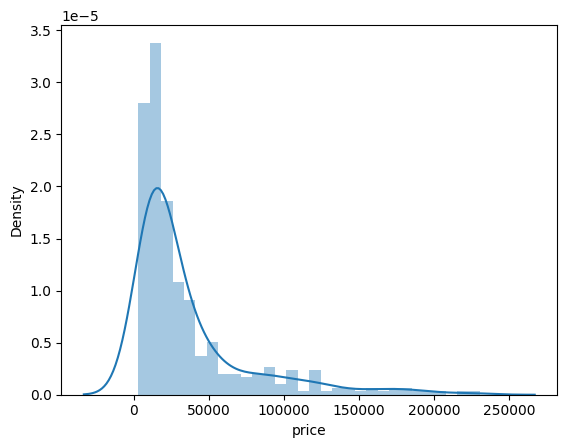

In [42]:
sns.distplot(df['price'])

In [43]:
# Check the skewness of the 'price' column
price_skewness = df['price'].skew()
print(f"Skewness of price: {price_skewness}")

Skewness of price: 2.281672679803567


In [44]:
import numpy as np

# Apply log transformation to reduce skewness
df['price'] = np.log1p(df['price'])

# Check skewness after transformation
price_skewness_after = df['price'].skew()
print(f"Skewness of price after log transformation: {price_skewness_after}")

Skewness of price after log transformation: 0.3635594100167996


<Axes: xlabel='price', ylabel='Density'>

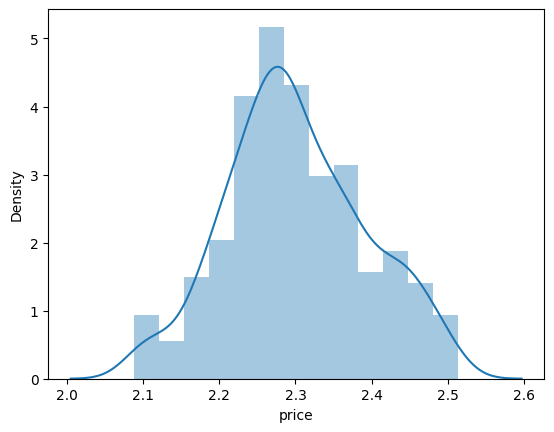

In [45]:
sns.distplot(np.log(df['price']))

<Axes: xlabel='brand'>

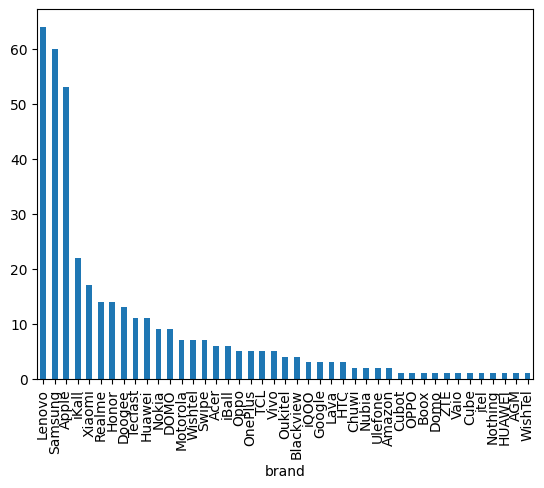

In [46]:
df['brand'].value_counts().plot(kind='bar')

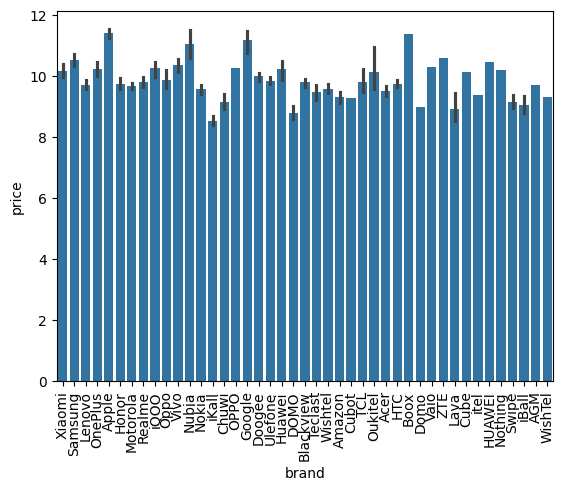

In [47]:
sns.barplot(x=df['brand'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   390 non-null    object 
 1   brand                  390 non-null    object 
 2   rating                 390 non-null    float64
 3   price                  390 non-null    float64
 4   processor_brand        379 non-null    object 
 5   num_processor          379 non-null    float64
 6   processor_speed        325 non-null    float64
 7   ram                    365 non-null    float64
 8   memory_inbuilt         387 non-null    float64
 9   battery_capacity       359 non-null    float64
 10  charger                208 non-null    float64
 11  charging               229 non-null    object 
 12  display_size_inches    389 non-null    float64
 13  pixel                  384 non-null    object 
 14  resolution_width       384 non-null    float64
 15  resolu

price                    1.000000
ram                      0.793541
processor_speed          0.773463
secondry_front_camera    0.768531
resolution_height        0.759572
display_size_inches      0.695329
primary_front_camera     0.686744
version                  0.665473
ppi                      0.656782
battery_capacity         0.595398
memory_inbuilt           0.594628
resolution_width         0.534345
secondry_rear_camera     0.482302
is_5G                    0.476200
num_processor            0.393514
primary_rear_camera      0.341676
charger                  0.270802
frequency_display_hz     0.208868
rating                  -0.005308
memory_card_upto        -0.100144
sim                     -0.106616
is_wifi                       NaN
Name: price, dtype: float64


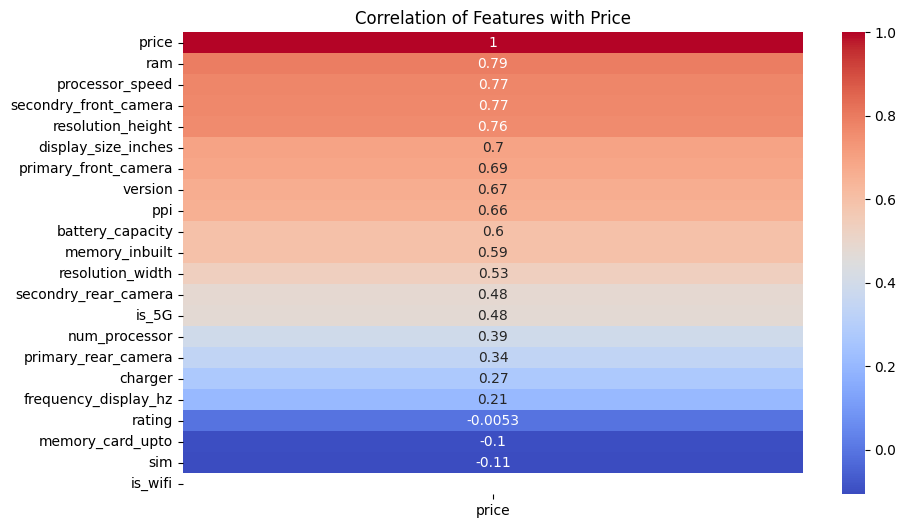

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation with 'price'
correlation = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation)

# Visualize the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Price')
plt.show()

In [50]:
print(df.columns)

Index(['name', 'brand', 'rating', 'price', 'processor_brand', 'num_processor',
       'processor_speed', 'ram', 'memory_inbuilt', 'battery_capacity',
       'charger', 'charging', 'display_size_inches', 'pixel',
       'resolution_width', 'resolution_height', 'ppi', 'frequency_display_hz',
       'primary_front_camera', 'secondry_front_camera', 'primary_rear_camera',
       'secondry_rear_camera', 'os_brand', 'version', 'memory_card_upto',
       'sim', 'is_5G', 'is_wifi', 'processor_cluster', 'os_brand_cluster'],
      dtype='object')


In [51]:
# List of features to remove
features_to_remove = ['rating','processor_speed','charger', 'charging', 
                      'frequency_display_hz','secondry_front_camera',
                      'secondry_rear_camera', 'processor_brand', 
                      'pixel','resolution_width', 'resolution_height', 'os_brand'
]

# Drop the specified features
df.drop(columns=features_to_remove, inplace=True)

# Verify the remaining columns
print("Remaining columns:", df.columns)

Remaining columns: Index(['name', 'brand', 'price', 'num_processor', 'ram', 'memory_inbuilt',
       'battery_capacity', 'display_size_inches', 'ppi',
       'primary_front_camera', 'primary_rear_camera', 'version',
       'memory_card_upto', 'sim', 'is_5G', 'is_wifi', 'processor_cluster',
       'os_brand_cluster'],
      dtype='object')


In [52]:
df.isnull().sum()

name                      0
brand                     0
price                     0
num_processor            11
ram                      25
memory_inbuilt            3
battery_capacity         31
display_size_inches       1
ppi                       6
primary_front_camera      4
primary_rear_camera       5
version                 263
memory_card_upto          0
sim                       0
is_5G                     0
is_wifi                   0
processor_cluster         0
os_brand_cluster          0
dtype: int64

In [53]:
# Replace NaN values
ram_mode = df['ram'].mode()[0]
df['ram'].fillna(ram_mode, inplace=True)
version_mode = df['version'].mode()[0]
df['version'].fillna(version_mode, inplace=True)
battery_median = df['battery_capacity'].median()
df['battery_capacity'].fillna(battery_median, inplace=True)

In [54]:
df.isnull().sum()

name                     0
brand                    0
price                    0
num_processor           11
ram                      0
memory_inbuilt           3
battery_capacity         0
display_size_inches      1
ppi                      6
primary_front_camera     4
primary_rear_camera      5
version                  0
memory_card_upto         0
sim                      0
is_5G                    0
is_wifi                  0
processor_cluster        0
os_brand_cluster         0
dtype: int64

In [55]:
# Replace NaN values with mode for specified columns
def fill_with_mode(column_name):
    return df[column_name].mode()[0]

columns_to_fill_mode = ['num_processor', 'memory_inbuilt', 'display_size_inches', 'ppi', 'primary_front_camera', 'primary_rear_camera']

for column in columns_to_fill_mode:
    df[column].fillna(fill_with_mode(column), inplace=True)

In [56]:
df.isnull().sum()

name                    0
brand                   0
price                   0
num_processor           0
ram                     0
memory_inbuilt          0
battery_capacity        0
display_size_inches     0
ppi                     0
primary_front_camera    0
primary_rear_camera     0
version                 0
memory_card_upto        0
sim                     0
is_5G                   0
is_wifi                 0
processor_cluster       0
os_brand_cluster        0
dtype: int64

price                   1.000000
ram                     0.793099
display_size_inches     0.694072
primary_front_camera    0.680894
ppi                     0.653559
memory_inbuilt          0.593526
battery_capacity        0.557869
is_5G                   0.476200
version                 0.451749
num_processor           0.370976
primary_rear_camera     0.338995
memory_card_upto       -0.100144
sim                    -0.106616
is_wifi                      NaN
Name: price, dtype: float64


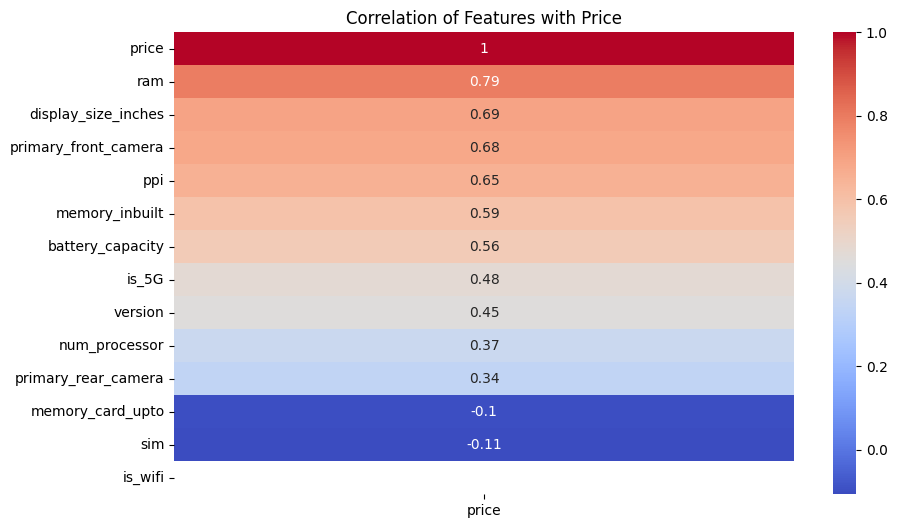

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation with 'price'
correlation = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation)

# Visualize the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Price')
plt.show()

In [58]:
df['is_wifi'].unique()

array([1])

<Axes: xlabel='price', ylabel='Density'>

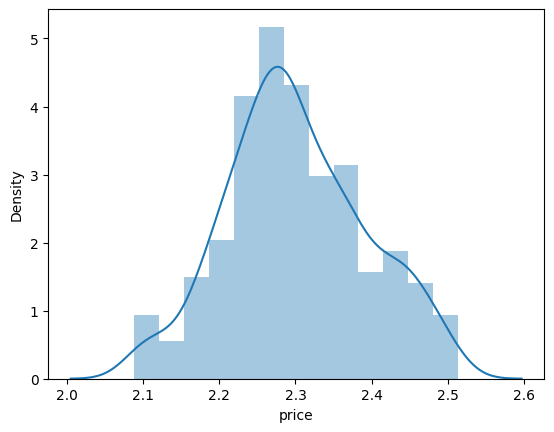

In [59]:
sns.distplot(np.log(df['price']))

In [60]:
X = df.drop(columns=['price'])
y = np.log(df['price'])

In [61]:
X

,name,brand,num_processor,ram,memory_inbuilt,battery_capacity,display_size_inches,ppi,primary_front_camera,primary_rear_camera,version,memory_card_upto,sim,is_5G,is_wifi,processor_cluster,os_brand_cluster
0,Xiaomi Pad 6S Pro,Xiaomi,8.0,8.0,256.0,10000.0,12.4,295.42,32.0,50.0,14.0,0,0,0,1,Snapdragon,Android
1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,8.0,4.0,64.0,7040.0,11.0,205.83,5.0,8.0,13.0,1024,0,1,1,Snapdragon,Android
2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,8.0,8.0,128.0,10200.0,12.7,273.36,13.0,8.0,13.0,1024,1,1,1,Snapdragon,Others
3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,8.0,8.0,256.0,8840.0,11.0,308.75,8.0,13.0,13.0,0,0,0,1,Snapdragon,Android
4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,8.0,8.0,256.0,10200.0,12.7,273.36,13.0,8.0,13.0,1024,1,1,1,Snapdragon,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Lenovo Tab K10 FHD Tablet (Wi-Fi + 32GB),Lenovo,8.0,3.0,32.0,7500.0,10.3,219.82,5.0,8.0,13.0,256,0,0,1,Others,Others
386,Apple iPad Pro 12.9 2021 Tablet (1TB),Apple,8.0,16.0,1000.0,7250.0,12.9,264.68,12.0,12.0,14.5,0,1,1,1,Apple,iOS
387,Honor Pad 7,Honor,8.0,4.0,64.0,5100.0,10.1,224.17,2.0,5.0,13.0,512,1,0,1,Others,Others
388,Lenovo Tab M10 (Wi-Fi+32GB),Lenovo,8.0,3.0,32.0,7000.0,10.1,224.17,5.0,8.0,13.0,1024,0,0,1,Snapdragon,Others


In [62]:
y

0      2.381359
1      2.301689
2      2.284984
3      2.329719
4      2.295377
         ...   
385    2.219235
386    2.489295
387    2.267419
388    2.239929
389    2.220229
Name: price, Length: 390, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [64]:
X_train

,name,brand,num_processor,ram,memory_inbuilt,battery_capacity,display_size_inches,ppi,primary_front_camera,primary_rear_camera,version,memory_card_upto,sim,is_5G,is_wifi,processor_cluster,os_brand_cluster
221,Apple iPad Pro 11 2022 Tablet (256GB),Apple,8.0,8.0,256.0,7538.0,11.00,264.81,12.0,12.0,16.0,0,1,1,1,Apple,iOS
17,OnePlus Pad Go Tablet (LTE+8GB+256GB),OnePlus,8.0,8.0,256.0,8000.0,11.35,260.72,8.0,8.0,13.0,1024,1,0,1,Others,Others
228,Apple iPad Pro 12.9 2022 Tablet (256GB),Apple,8.0,8.0,256.0,10758.0,12.90,264.68,12.0,12.0,16.0,0,1,1,1,Apple,iOS
70,Samsung Galaxy Tab S7 FE (Wi-Fi Only),Samsung,8.0,4.0,64.0,10090.0,12.40,243.46,5.0,8.0,13.0,1024,0,0,1,Snapdragon,Others
204,TCL NxtPaper 12 Pro,TCL,8.0,8.0,256.0,8000.0,12.20,212.79,8.0,13.0,13.0,512,1,1,1,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Lenovo Tab P11 5G,Lenovo,8.0,6.0,128.0,7500.0,11.00,212.03,8.0,13.0,13.0,1024,1,1,1,Snapdragon,Others
22,Lenovo Tab P12,Lenovo,8.0,8.0,256.0,10200.0,12.70,273.36,8.0,13.0,13.0,1024,0,0,1,Others,Android
72,Xiaomi Mi Pad 5 Pro 5G Tablet,Xiaomi,8.0,8.0,256.0,8600.0,11.00,274.44,8.0,50.0,11.0,0,1,1,1,Snapdragon,Android
15,Motorola Moto Tab G62 LTE,Motorola,8.0,4.0,64.0,7700.0,10.60,220.04,8.0,8.0,13.0,1024,1,0,1,Snapdragon,Others


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [66]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 221 to 168
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  331 non-null    object 
 1   brand                 331 non-null    object 
 2   num_processor         331 non-null    float64
 3   ram                   331 non-null    float64
 4   memory_inbuilt        331 non-null    float64
 5   battery_capacity      331 non-null    float64
 6   display_size_inches   331 non-null    float64
 7   ppi                   331 non-null    float64
 8   primary_front_camera  331 non-null    float64
 9   primary_rear_camera   331 non-null    float64
 10  version               331 non-null    float64
 11  memory_card_upto      331 non-null    int64  
 12  sim                   331 non-null    int64  
 13  is_5G                 331 non-null    int64  
 14  is_wifi               331 non-null    int64  
 15  processor_cluster     331 

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define transformations
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,15,16])
], remainder='passthrough')

# Define model
step2 = LinearRegression()

# Create pipeline
pipe_lr = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on training data
pipe_lr.fit(X_train, y_train)

# Make predictions
y_pred = pipe_lr.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score: 0.73932700638467
MAE: 0.02838492437605483
RMSE: 0.04350100859966709


In [69]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,15,16])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe_rd = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rd.fit(X_train,y_train)

y_pred = pipe_rd.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.7918760032710666
MAE 0.02483752494936212
RMSE 0.03886980710342267


In [70]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,15,16])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe_ls = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_ls.fit(X_train,y_train)

y_pred = pipe_ls.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.7884460536426207
MAE 0.0257932176835246
RMSE 0.03918879162133631


In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,15,16])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe_knn = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_knn.fit(X_train,y_train)

y_pred = pipe_knn.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.7035392372826488
MAE 0.03060747909561957
RMSE 0.04639112639977066


In [72]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,15,16])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe_svr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_svr.fit(X_train,y_train)

y_pred = pipe_svr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.5256958874774013
MAE 0.04829874539469665
RMSE 0.0586786011236914


In [73]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,15,16])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=4,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=20)

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.8087704088003573
MAE 0.024548361473814236
RMSE 0.03725879928361563


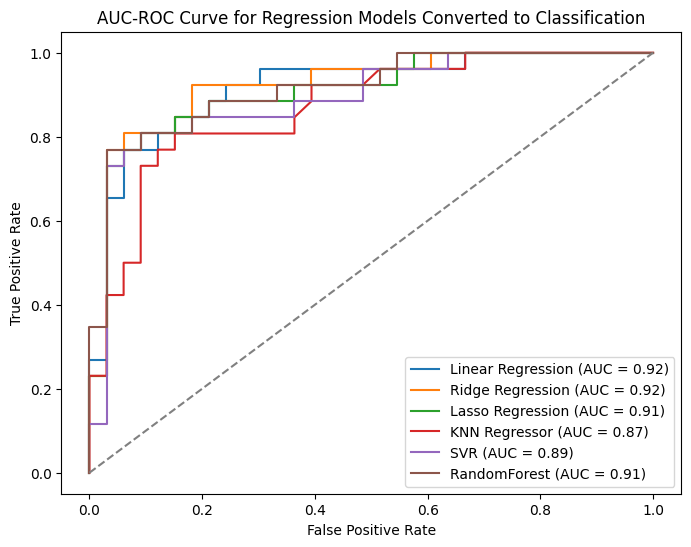

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Define a threshold for classification (e.g., median of training data)
threshold = np.median(y_train)

# Convert y_test into binary labels
y_test_binary = (y_test > threshold).astype(int)

# Store model names and their trained pipeline objects
models = {
    "Linear Regression": pipe_lr,  # Update these if names are different
    "Ridge Regression": pipe_rd,
    "Lasso Regression": pipe_ls,
    "KNN Regressor": pipe_knn,
    "SVR":pipe_svr,
    "RandomForest":pipe_rf,
}

plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    y_pred_prob = model.predict(X_test)  # Get predicted values
    y_pred_class = (y_pred_prob > threshold).astype(int)  # Convert predictions to binary
    
    # Compute AUC and ROC Curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)  # Use binarized y_test
    auc_score = roc_auc_score(y_test_binary, y_pred_prob)
    
    # Plot the ROC Curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Regression Models Converted to Classification")
plt.legend()

# Save the figure as an SVG file
plt.savefig('AUC_ROC_Curve_tablet.svg', format='svg')
plt.show()


In [75]:
from sklearn.ensemble import StackingRegressor

In [76]:
final_estimator = Ridge()


In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,15,16])
],remainder='passthrough')

base_models = [
    ('linear', Pipeline(steps=[
        ('step1', step1), 
        ('step2', LinearRegression())
    ])),
    ('ridge', Pipeline(steps=[
        ('step1', step1),
        ('step2', Ridge(alpha=10))
    ])),
    ('lasso', Pipeline(steps=[
        ('step1', step1),
        ('step2', Lasso(alpha=0.001))
    ])),
    ('random', Pipeline(steps=[
        ('step1', step1),
        ('step2', RandomForestRegressor(n_estimators=100,
                              random_state=4,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=20))
    ])),
    ('svr', Pipeline(steps=[
        ('step1', step1),
        ('step2', SVR(kernel='rbf',C=10000,epsilon=0.1))
    ]))
]
# Define your meta model (Ridge)
meta_model = Ridge(alpha=0.1)

# Set up the Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Optionally, you can wrap this in a pipeline if you need preprocessing
# Here we use a simple StandardScaler for preprocessing
pipeline = Pipeline(steps=[
    ('step1', step1),  # Scaling for the base models
    ('stacked_model', stacked_model)
])

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

#r2 score evaluate
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Output the results
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f'Mean Squared Error: {mse}')


R² Score: 0.7916542435908785
Mean Absolute Error (MAE): 0.024483406422451295
Mean Squared Error: 0.0015124717534719966


In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,15,16])
],remainder='passthrough')

base_models = [
    ('linear', Pipeline(steps=[
        ('step1', step1), 
        ('step2', LinearRegression())
    ])),
    ('ridge', Pipeline(steps=[
        ('step1', step1),
        ('step2', Ridge(alpha=10))
    ])),
    ('lasso', Pipeline(steps=[
        ('step1', step1),
        ('step2', Lasso(alpha=0.001))
    ])),
    ('random', Pipeline(steps=[
        ('step1', step1),
        ('step2', RandomForestRegressor(n_estimators=100,
                              random_state=4,
                              max_samples=0.6,
                              max_features=0.75,
                              max_depth=20))
    ])),
    ('svr', Pipeline(steps=[
        ('step1', step1),
        ('step2', SVR(kernel='rbf',C=10000,epsilon=0.1))
    ]))
]
# Define your meta model (RandomForest)
meta_model = RandomForestRegressor(random_state=2)

# Set up the Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Optionally, you can wrap this in a pipeline if you need preprocessing
# Here we use a simple StandardScaler for preprocessing
pipeline = Pipeline(steps=[
    ('step1', step1),  # Scaling for the base models
    ('stacked_model', stacked_model)
])

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

#r2 score evaluate
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Output the results
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f'Mean Squared Error: {mse}')


R² Score: 0.7586228010040763
Mean Absolute Error (MAE): 0.02562443456544154
Mean Squared Error: 0.0017522612493082706


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assume your stacked model is named: stacked_model
# And your features and target are: X, y

# R² Score Cross-validation
r2_scores = cross_val_score(stacked_model, X, y, cv=5, scoring='r2')
print("R² Scores (CV):", r2_scores)
print("Mean R² Score:", np.mean(r2_scores))

# MAE Cross-validation
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(stacked_model, X, y, cv=5, scoring=mae_scorer)
print("MAE Scores (CV):", -mae_scores)  # Negate to get positive values
print("Mean MAE Score:", -np.mean(mae_scores))

# MSE Cross-validation
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(stacked_model, X, y, cv=5, scoring=mse_scorer)
print("MSE Scores (CV):", -mse_scores)
print("Mean MSE Score:", -np.mean(mse_scores))


R² Scores (CV): [0.66583316 0.8785201  0.83404338 0.87874484 0.89439795]
Mean R² Score: 0.830307885104624
MAE Scores (CV): [0.02870068 0.02152821 0.02738405 0.02044287 0.02629446]
Mean MAE Score: 0.02487005210472259
MSE Scores (CV): [0.00136064 0.00081763 0.00153542 0.00079403 0.00110224]
Mean MSE Score: 0.0011219938122431009


In [80]:
stacking_regressor = StackingRegressor(
    estimators=[
        ('ridge', pipe_rd),
        ('lasso', pipe_ls),
        ('svr', pipe_svr),
        ('linear', pipe_lr),
        ('random',pipe_rf)
    ],
    final_estimator=final_estimator,
    passthrough=False,  # if True, raw features are also passed to the final estimator
    n_jobs=-1
)

# Fit and evaluate
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 0.025519941975899317
MSE: 0.001461109165510926
R2: 0.7987295342303988


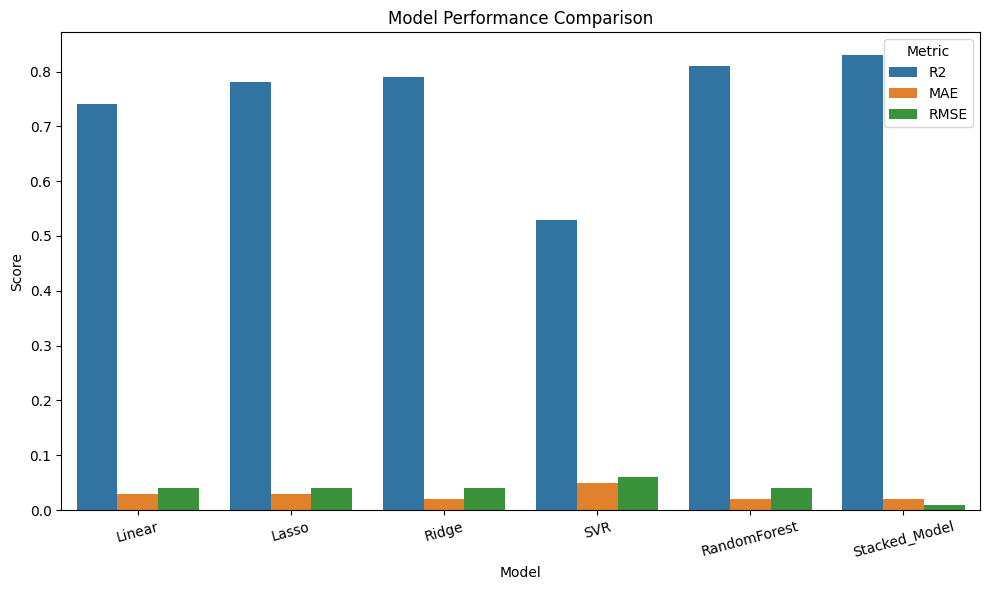

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your results as a dictionary
results = {
    'Linear': {'R2': 0.74,'MAE': 0.03,'RMSE': 0.04},
    'Lasso': {'R2':0.78,'MAE':0.03,'RMSE':0.04},
    'Ridge': {'R2':0.79,'MAE': 0.02,'RMSE': 0.04},
    'SVR': {'R2':0.53,'MAE':0.05,'RMSE':0.06},
    'RandomForest': {'R2': 0.81,'MAE': 0.02,'RMSE': 0.04},
    'Stacked_Model': {'R2':0.83,'MAE': 0.02,'RMSE': 0.01}
}

# Convert to DataFrame
df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Melt for plotting
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.tight_layout()

# Save the figure as an SVG file
plt.savefig('model_performance_comparison_tablet.svg', format='svg')

plt.show()
